In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
import math
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn import metrics
from sklearn.metrics import classification_report
%matplotlib inline

In [13]:
cer=pd.read_excel("Cereals1.xls")
cer

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
1,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
2,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
3,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
4,Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1.0,0.75,29.509541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
72,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
73,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
74,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


## 1) Five number summary of numeric attributes 

In [14]:
df=cer.describe()

df[3:8]

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
min,50.0,1.0,0.0,0.0,0.00,-1.0,-1.0,-1.0,0.0,1.0,0.5,0.25,18.042851
25%,100.0,2.0,0.0,132.5,0.75,12.0,3.0,40.0,25.0,1.0,1.0,0.67,32.932466
50%,110.0,2.5,1.0,180.0,1.75,14.5,7.0,90.0,25.0,2.0,1.0,0.75,40.253086
75%,110.0,3.0,2.0,212.5,3.00,17.0,11.0,120.0,25.0,3.0,1.0,1.00,50.780847
max,160.0,6.0,5.0,320.0,14.00,23.0,15.0,330.0,100.0,3.0,1.5,1.50,93.704912


## 2,3) Treatment of missing values 

In [15]:
mean =cer["potass"].mean()
table=cer["potass"].replace(to_replace=-1,value=mean,inplace=True)

mean =cer["carbo"].mean()
table=cer["carbo"].replace(to_replace=-1,value=mean,inplace=True)

mean =cer["sugars"].mean()
table=cer["sugars"].replace(to_replace=-1,value=mean,inplace=True)

df=cer.describe()

df[3:8]

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
min,50.0,1.0,0.0,0.0,0.00,7.000000,0.0,15.00,0.0,1.0,0.5,0.25,18.042851
25%,100.0,2.0,0.0,132.5,0.75,12.000000,3.0,43.75,25.0,1.0,1.0,0.67,32.932466
50%,110.0,2.5,1.0,180.0,1.75,14.861842,7.0,90.00,25.0,2.0,1.0,0.75,40.253086
75%,110.0,3.0,2.0,212.5,3.00,17.000000,11.0,120.00,25.0,3.0,1.0,1.00,50.780847
max,160.0,6.0,5.0,320.0,14.00,23.000000,15.0,330.00,100.0,3.0,1.5,1.50,93.704912


Yes, i think it was pretty effective.
* We can observe some minor variation in the min, max and quartile values after the missing values were replaced

## 4, 5) Treatment of noisy data 

In [8]:


# Function to Detection Outlier on one-dimentional datasets.
def find_anomalies(ar,l):
    #define a list to accumlate anomalies
    anomalies = []
    
    median = cer[l].median()
    # Set upper and lower limit to 3 standard deviation
    random_data_std = ar.std()
    random_data_mean = ar.mean()
    cut_off = random_data_std * 2
    
    #Calculate the range
    lower_limit  = random_data_mean - cut_off 
    upper_limit = random_data_mean + cut_off
    
    #replace outliers
    for outlier in ar:
        if outlier > upper_limit or outlier < lower_limit:
            table=cer[l].replace(to_replace=outlier,value=median,inplace=True)
    return anomalies

#Preparation of list of numeric attributes
list=cer.select_dtypes(include=np.number).columns.tolist()

#Function call to pass all the numeric attributes
for l in list:
    find_anomalies(np.array(cer[l]),l)

In [9]:
df=cer.describe()
df[3:8]

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
min,70.0,1.00,0.00,0.0,0.000,8.000000,0.0,15.00,0.0,1.0,0.83,0.50,18.042851
25%,100.0,2.00,0.00,132.5,0.750,12.000000,3.0,43.75,25.0,1.0,1.00,0.67,32.932466
50%,110.0,2.25,1.00,180.0,1.625,14.861842,7.0,90.00,25.0,2.0,1.00,0.75,40.179526
75%,110.0,3.00,1.25,212.5,3.000,17.000000,11.0,110.00,25.0,3.0,1.00,1.00,49.218158
max,140.0,4.00,3.00,320.0,6.000,22.000000,15.0,200.00,25.0,3.0,1.33,1.25,68.235885


Yes I feel the strategy has been pretty effective. From comparing the descriptions of the data set after treating the missing values and after treating the noisy values, we can see some differences. 

* The min and max has come closer after removing the outliers, ie that dataset has become more compacted. 
* We can observe some minor variations in the quartile values in some cases and major in other cases. 

Overall, we could obtain some difference after treating the noisy data and the strategy that we used was pretty effective. Now the data is effectively pre-processed.

## 6)Crosstab of cereal v/s manufacturer 

In [10]:
pd.crosstab(cer["type"],cer["mfr"])

mfr,A,G,K,N,P,Q,R
type,,,,,,,
C,0,22,23,4,9,7,8
H,1,0,0,1,0,1,0


## 7) Cereal with best and worst rating 

In [11]:
max=cer["rating"].max()
print("Cereal with best rating is " + (cer.loc[cer['rating'] == max]["name"]))

min=cer["rating"].min()
print("Cereal with worst rating is " + cer.loc[cer["rating"]==min]["name"])


62    Cereal with best rating is Shredded_Wheat
Name: name, dtype: object
9    Cereal with worst rating is Cap'n'Crunch
Name: name, dtype: object


## 8) Boxplot of item types

<function matplotlib.pyplot.show(close=None, block=None)>

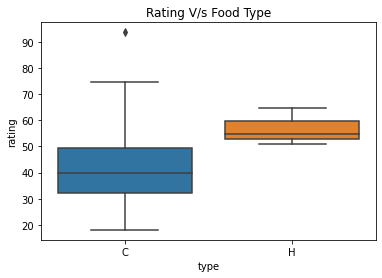

In [164]:
sns.boxplot(x=cer["type"],y=cer["rating"])
plt.title("Rating V/s Food Type")
plt.show

## 9) Relation between sugars, calories, fat and carbs 

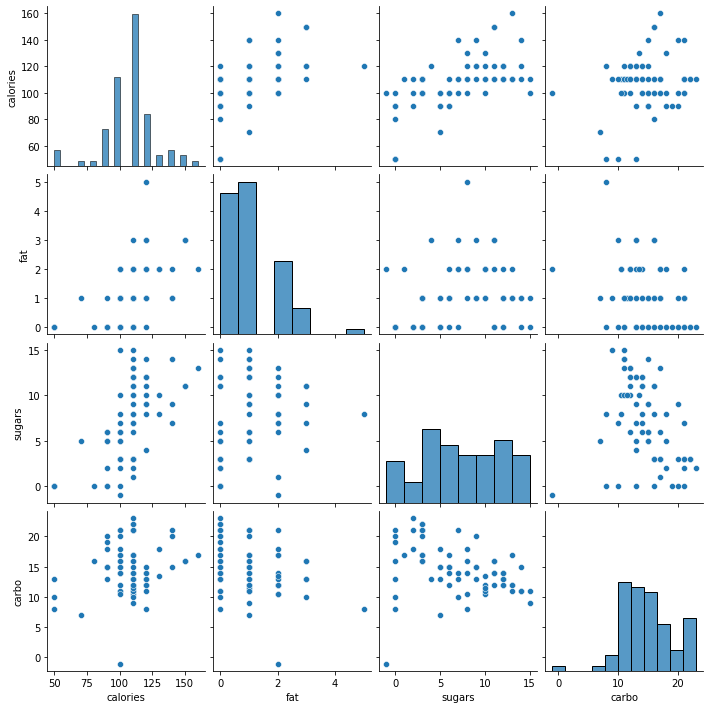

In [12]:
correlation=cer[["calories","fat","sugars","carbo"]]
sns.pairplot(correlation)
plt.show()

From, the graph we can make a few inferences

* calories tend to increase with increase in sugar(0.57).
* calories tend to increase with increase in fat(0.5).

## 10) Manufacturer with highest calorie produce 

In [174]:
max=cer["calories"].max()
print("The manufactorer with highest cal produce is " + cer.loc[cer["calories"]==max]["mfr"])

45    The manufactorer with highest cal produce is K
Name: mfr, dtype: object


## 11) Assciation between calories and consumer rating 

In [16]:
cer["rating"].corr(cer["calories"])

-0.6743360496799726

Moderately strong negative correlation, as calories increase, rating tends to decrease.

<AxesSubplot:xlabel='calories', ylabel='rating'>

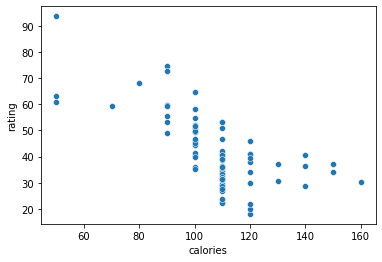

In [20]:
sns.scatterplot(x=cer["calories"], y=cer["rating"])

from the graph, we can infer that as the as the no of calories of food increases, the rating decreases. A moderately strong negative correlation.

## 12) Association between ratings and shelf level 

In [13]:
cer["rating"].corr(cer["shelf"])

0.001973020750965257

<AxesSubplot:xlabel='shelf', ylabel='rating'>

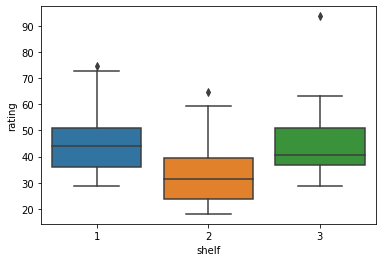

In [15]:
sns.boxplot(y=cer["rating"],x=cer["shelf"])

we can see that the cereals kept at the 1st and the 3rd shelfs have a better rating compared to the 2nd shelf

## 13) Relation between manufacturer  and rating

<AxesSubplot:xlabel='mfr', ylabel='rating'>

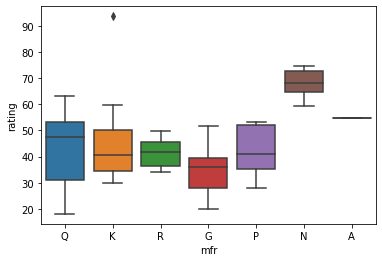

In [11]:
sns.boxplot(x=cer["mfr"],y=cer["rating"])

From the graph we can infer that, The manufactorer 'N' has the highest rating, and manufactorer 'G' has the lowest ratings.

## 14) Nutrients Essential for good rating 

<AxesSubplot:>

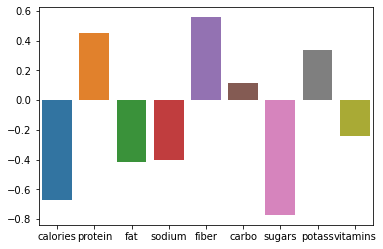

In [44]:
list=['calories','protein','fat','sodium','fiber','carbo','sugars','potass','vitamins']
corrlist=[]

for l in list:
    corrlist.append(cer[l].corr(cer["rating"]))

sns.barplot(x=list, y=corrlist)
    
    

From the graph, we can infer that ratings of the cereal have,
* a strong -ve correlation :- calories and sugars. 
* That is as the sugar and calorie value increases in the cereal, the rating tends to decrease.

* a moderately +ve correlation :- protein and fiber 
* That is as the protein and fiber value increases in the cereal, the rating tends to increase.

## 15) Linear regression model 

From the previous question, we can infer that the nutrients that most influence the ratings are, calories, fiber and sugars.

### Prediction 

In [7]:
X =cer[['calories','fiber','sugars']]
Y=cer['rating']

#Split that data into test and training sets(80-20)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2,random_state=101)

lm = LinearRegression() # Creating an Instance of LinearRegression model
lm.fit(X_train,Y_train) # Train/fit on the training data

#Creating dataframe with the coefficients.
co=pd.DataFrame(lm.coef_,X.columns)
co.columns = ['Coefficient']
co

,Coefficient
calories,-0.179364
fiber,2.584778
sugars,-1.868813


Interpreting the coefficients:
Holding all other features fixed, we predict that
* a one unit increase in calories is associated with an decrease of 0.18 rating.
* a one unit increase in fiber is associated with an increase of 2.54 rating.
* a one unit increase in sugars is associated with an decrease of 1.86 rating.


### Testing Accuracy 

In [10]:
prediction = lm.predict(X_test)

MAE= metrics.mean_absolute_error(Y_test,prediction) 
MSE= metrics.mean_squared_error(Y_test,prediction)
RMSE= np.sqrt(metrics.mean_squared_error(Y_test, prediction))
R_SQ = metrics.r2_score(Y_test, prediction)

list=[MAE,MSE,RMSE,R_SQ]
labels=['MAE','MSE','RMSE','R_SQ']
l=pd.DataFrame(list,labels)
l.columns=['Values']
l


,Values
MAE,4.035271
MSE,28.154892
RMSE,5.306118
R_SQ,0.895384


* Residual is the difference between the actual and predicted values.
* (MAE) Mean absolute error:- measures the average of residuals.
* (MSE) Mean Squared error :- measures the variance of residuals.
* (RMSE) Root mean squared error :- measures the standard deviation of the residuals
* (R_SQ) R-Squared :- Tells us about the proportion of residuals on the regression line

A generally high value od R_SQ and low value of RMSE is required for the model to be accurate, here it is
* R_SQ :- 0.895384(almost near 0.9, strong)
* RMSE :-	5.306118

Therefore we can conclude that the model is pretty accurate
